In [1]:
%matplotlib inline

In [28]:
# %load analysis.py
import seaborn as sns
import datetime
import pandas
import matplotlib.pyplot as plt
from geopy.distance import vincenty


# from multiprocessing import Pool, cpu_count
# pool = Pool(cpu_count())  # use cpu processes

def print_nominals(data):
    # print("\n\ncategories(Category):")
    # print(data["Descript"].unique())

    # uses IncidntNum as every row has it populated
    categories = data.groupby("Category")["IncidntNum"].count().sort_values(0, ascending=False)
    print("")
    print(categories)

    descriptions = data.groupby("Descript")["IncidntNum"].count().sort_values(0, ascending=False)
    print("")
    print(descriptions)

    districts = data.groupby("PdDistrict")["IncidntNum"].count().sort_values(0, ascending=False)
    print("")
    print(districts)

    resolutions = data.groupby("Resolution")["IncidntNum"].count().sort_values(0, ascending=False)
    print("")
    print(resolutions)

    print("\n\n")
    print("number of records: %s" % data["IncidntNum"].size)
    print("number of incidntNum: %s" % data["IncidntNum"].unique().size)
    print("number of PdId: %s" % data["PdId"].unique().size)


def calculate_distances(data):
    # type: (pandas.DataFrame) -> None

    # parse location into tuples
    # print(sanfran["Location"][0])
    # print(sanfran["Location"].str.extract("\\(([^,]*), ([^)]*)\\)", expand=True)[1:5])
    sanfran = data.sort_values(["PdDistrict", "DateTime"], )
    tuples = [tuple(x) for x in sanfran["Location"].str.extract("\\(([^,]*), ([^)]*)\\)", expand=True).values]
    sanfran["Location"] = pandas.Series(tuples)
    print(sanfran["Location"][0])

    sanfran["LocationP1"] = sanfran["Location"].shift(1)
    # distances = vincenty(sanfran["Location"], sanfran["Location"].shift(1)).miles
    vincenty(sanfran["Location"][0], sanfran["Location"][1]).miles
    # print(distances)


print("Reading data...")
sanfran = pandas.read_csv("sanfrancisco_incidents_summer_2014.csv", parse_dates={'DateTime': ['Date', 'Time']})


# wrong sanfran["Date"] = pandas.concat([sanfran["Date"], sanfran["Time"]]).reindex_like(sanfran)
# sanfran["DateTime"] = pandas.to_datetime(sanfran["Date"] + " " + sanfran["Time"])
# sanfran["Date"] = pandas.to_datetime(sanfran["Date"], dayfirst=False)
# sanfran["Time"] = pandas.to_datetime(sanfran["Time"], dayfirst=False)


# print(sanfran.describe())
# print(sanfran[0:4])



def plot_category(data):
    print("plotting categories")
    sanfran = data.groupby("IncidntNum").first()

    plot1 = sns.stripplot(x="DateTime", y="Category", data=sanfran, jitter=True)
    plot1.set_xlim(datetime.datetime(2014, 6, 1), datetime.datetime(2014, 9, 1))

    # sns.barplot(x="DateTime", y="Category", data=sanfran, jitter=True)

    # g = sns.FacetGrid(data=sanfran, row="PdDistrict", col="DayOfWeek")
    # g.map(sns.barplot, "DateTime", "Category", estimator=len).set_axis_labels("Date", "Category")
    # sns.tsplot(sanfran, time="DateTime", value="")

    sns.plt.show()
    print("Done plot")


def plot_districts(data):
    print("plotting districts")
    filteredData = data.groupby("IncidntNum").first()

    plot1 = sns.stripplot(x="DateTime", y="PdDistrict", data=filteredData, jitter=True)
    plot1.set_xlim(datetime.datetime(2014, 6, 1), datetime.datetime(2014, 9, 1))

    # plot2 = sns.swarmplot(x="DateTime", y="PdDistrict", data=filteredData)
    # f, axes = plt.subplots(figsize=(7, 7))
    plot2 = sns.violinplot(x="DateTime", y="PdDistrict", data=filteredData)
    plot2.set_xlim(datetime.datetime(2014, 6, 1), datetime.datetime(2014, 9, 1))

    print("Done plot(s)")


def print_categories(data):
    print("homicides/murder")
    print(sanfran[sanfran["Descript"].str.contains("HOMICIDE")][["Descript", "Category"]]
          .groupby(["Descript", "Category"]).aggregate(len))

    print("gun crimes")
    print(sanfran[sanfran["Descript"].str.contains("GUN")][["Descript", "Category"]]
          .groupby(["Descript", "Category"]).aggregate(len))

    print("sex crimes")
    print(sanfran[sanfran["Descript"].str.contains("SEX")][["Descript", "Category"]]
          .groupby(["Descript", "Category"]).aggregate(len))


# plot_category(sanfran)

filteredData = sanfran.groupby("IncidntNum").first()

print("ready")

Reading data...
ready


# Categories

## Homicides/Murder

In [29]:
sanfran[sanfran["Descript"].str.contains("HOMICIDE")][["Descript", "Category"]].groupby(["Descript", "Category"]).aggregate(len)

Descript                                    Category
ATTEMPTED HOMICIDE WITH A DANGEROUS WEAPON  ASSAULT      9
ATTEMPTED HOMICIDE WITH A GUN               ASSAULT     15
ATTEMPTED HOMICIDE WITH A KNIFE             ASSAULT      2
ATTEMPTED HOMICIDE WITH BODILY FORCE        ASSAULT      4
dtype: int64

## Gun crimes

In [30]:
sanfran[sanfran["Descript"].str.contains("GUN")][["Descript", "Category"]].groupby(["Descript", "Category"]).aggregate(len)

Descript                                          Category    
AGGRAVATED ASSAULT WITH A GUN                     ASSAULT         34
ATTEMPTED HOMICIDE WITH A GUN                     ASSAULT         15
ATTEMPTED ROBBERY COMM. ESTABLISHMENT WITH A GUN  ROBBERY          2
ATTEMPTED ROBBERY ON THE STREET WITH A GUN        ROBBERY          8
ATTEMPTED ROBBERY RESIDENCE WITH A GUN            ROBBERY          1
ATTEMPTED ROBBERY WITH A GUN                      ROBBERY          7
CARJACKING WITH A GUN                             ROBBERY          7
MAYHEM WITH A GUN                                 ASSAULT          1
POSSESSION OF AIR GUN                             WEAPON LAWS     13
POSSESSION OF MACHINE GUN                         WEAPON LAWS      1
ROBBERY OF A BANK WITH A GUN                      ROBBERY          2
ROBBERY OF A CHAIN STORE WITH A GUN               ROBBERY          1
ROBBERY OF A COMMERCIAL ESTABLISHMENT WITH A GUN  ROBBERY         11
ROBBERY OF A RESIDENCE WITH A GUN       

## Sex Crimes

In [31]:
sanfran[sanfran["Descript"].str.contains("SEX")][["Descript", "Category"]].groupby(["Descript", "Category"]).aggregate(len)

Descript                             Category      
FAILURE TO REGISTER AS SEX OFFENDER  OTHER OFFENSES    21
dtype: int64

# Districts

(735385.0, 735477.0)

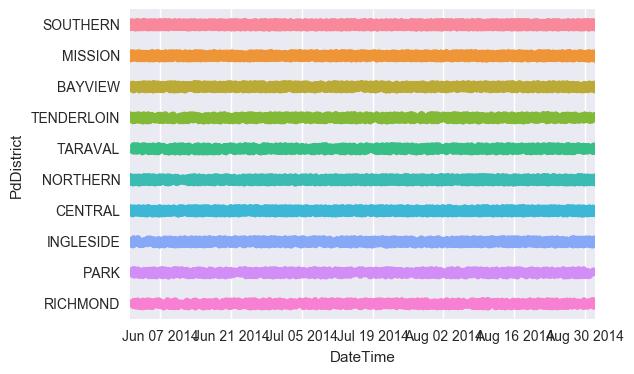

In [32]:
plot1 = sns.stripplot(x="DateTime", y="PdDistrict", data=filteredData, jitter=True)
plot1.set_xlim(datetime.datetime(2014, 6, 1), datetime.datetime(2014, 9, 1))

In [33]:
plot2 = sns.violinplot(x="DateTime", y="PdDistrict", data=filteredData, orient="h", inner=None)
# noop = plot2.set_xlim(datetime.datetime(2014, 6, 1), datetime.datetime(2014, 9, 1))

TypeError: invalid type promotion

In [35]:
plot3 = sns.distplot("DateTime", data=filteredData)

TypeError: distplot() got an unexpected keyword argument 'hue'